In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../src/pointnet/'))
DB_PATH = os.path.abspath(os.path.join('../src/pointnet/data/database.sqlite3'))
if module_path not in sys.path:
    sys.path.append(module_path)

import altair as alt
from matplotlib import pyplot as plt
import pandas as pd
from datetime import datetime
import numpy as np
import json
from typing import List
from src.interfaces.database import SQLiteProxy


In [2]:
db = SQLiteProxy(DB_PATH)
db.get_no_cones().clean()

In [12]:
bounding_boxes = db.get_point_clouds().extract_bounding_boxes('montmelo', no_cones=False, centered=True, sample_size=None)

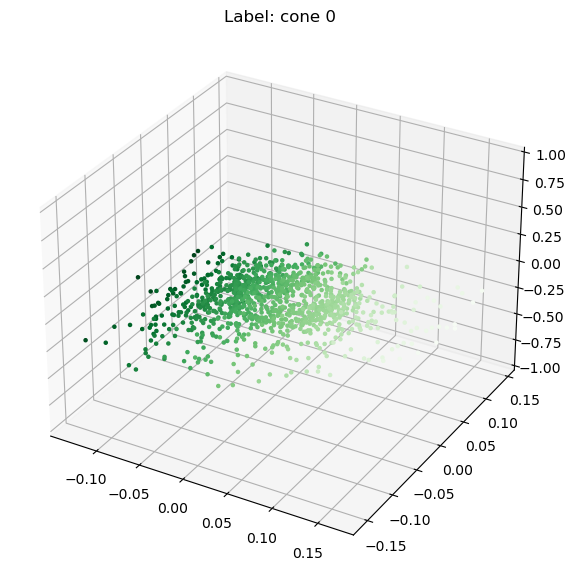

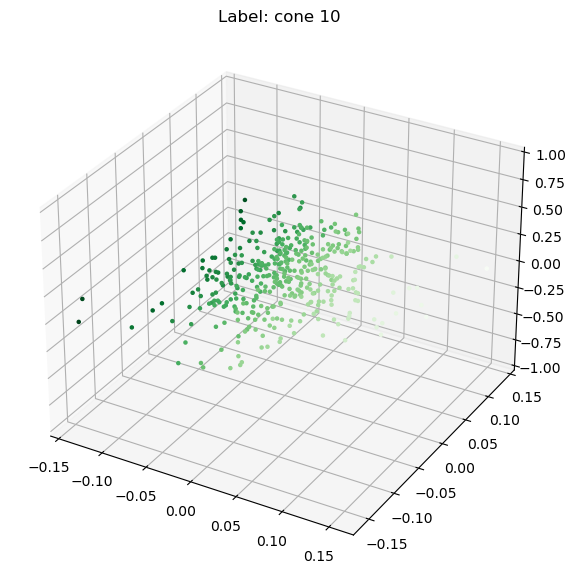

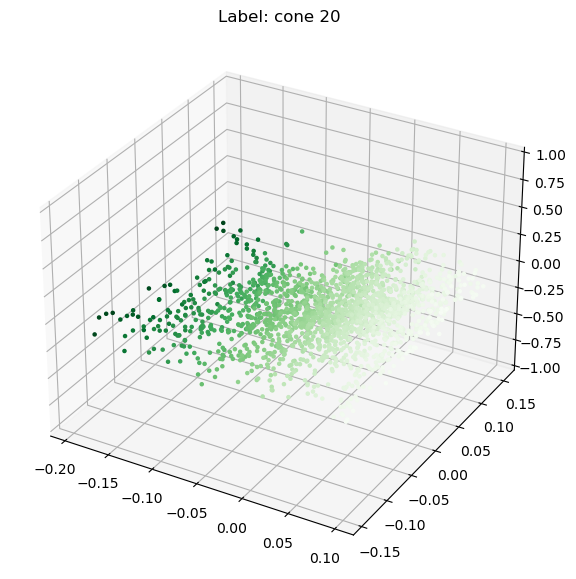

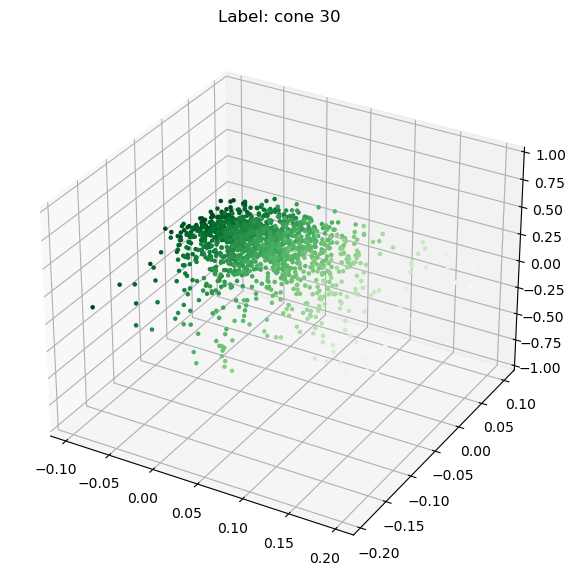

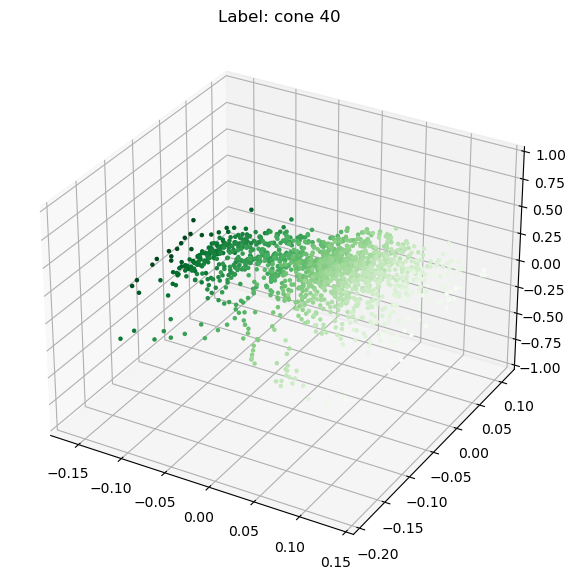

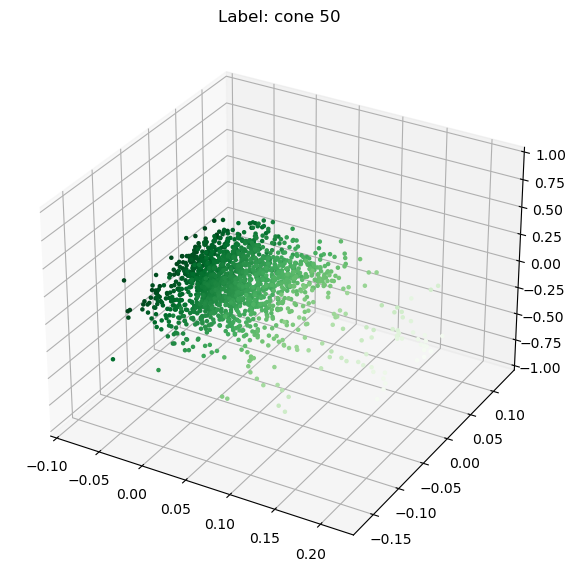

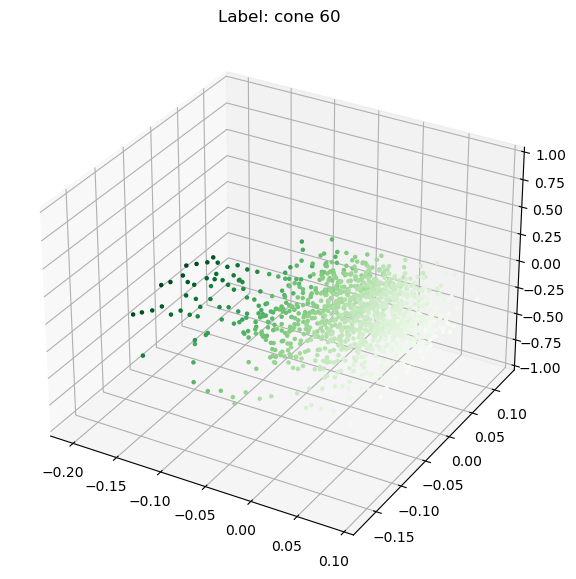

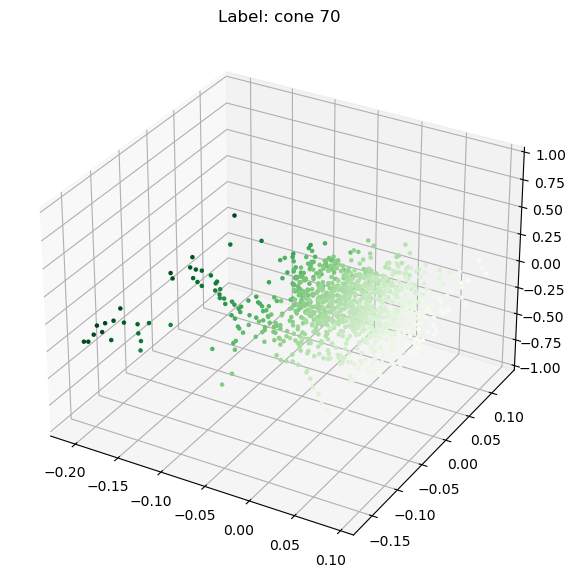

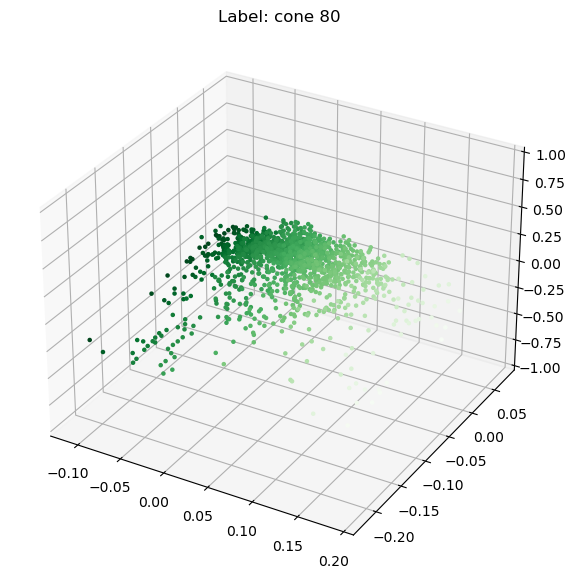

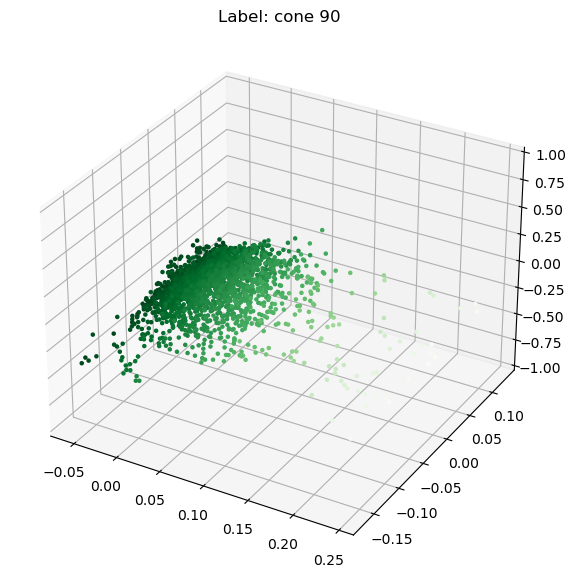

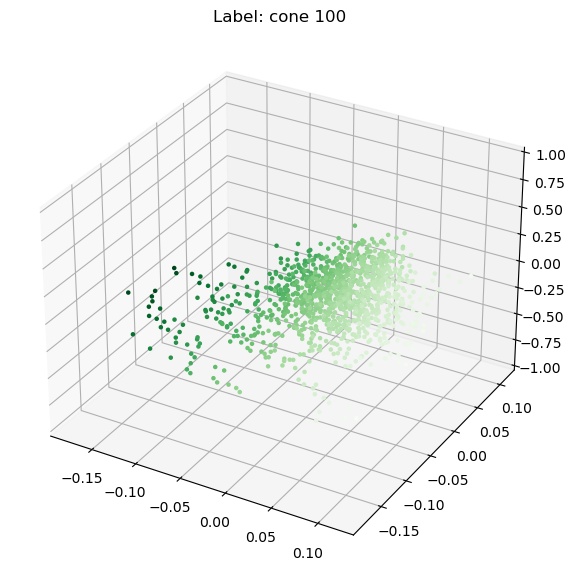

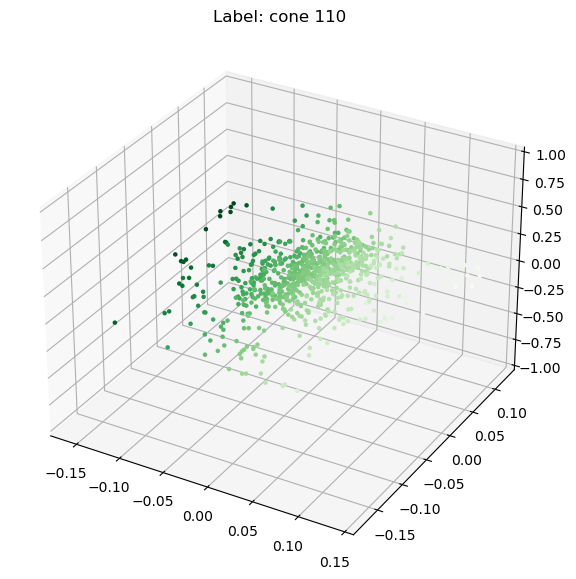

In [13]:
for i, bb in enumerate(bounding_boxes[::10]):
    pc = np.array(bb.points)
    fig = plt.figure(figsize=[7,7])
    ax = plt.axes(projection='3d')
    sc = ax.scatter(-pc[:,0], pc[:,1], -pc[:,2], c=pc[:,0] ,s=5, marker='o', cmap="Greens", alpha=1)
    ax.set_zlim3d(-1, 1)
    plt.title(f'Label: cone {i*10}')
    plt.show()